In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Missing values

In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

age            AxesSubplot(0.125,0.787927;0.227941x0.0920732)
bmi         AxesSubplot(0.398529,0.787927;0.227941x0.0920732)
children    AxesSubplot(0.672059,0.787927;0.227941x0.0920732)
charges        AxesSubplot(0.125,0.677439;0.227941x0.0920732)
dtype: object

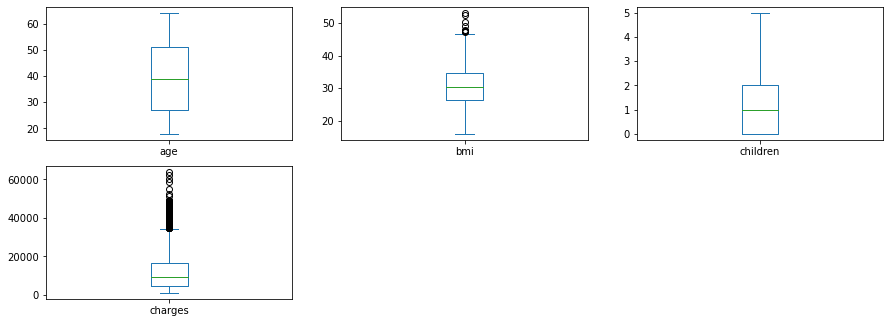

In [5]:
df.plot(kind='box',layout=(7,3),subplots=True,figsize=(15,20))

removing outliers

In [6]:
def remove_outliers(df,col):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    IQR=q3-q1
    lower_bound=q1-1.5*IQR
    upper_bound=q3+1.5*IQR
    df[col]=np.clip(df[col],lower_bound,upper_bound)
    return df

def out_all(df,col_list):
    for c in col_list:
        df=remove_outliers(df,c)
    return df

In [7]:
df=out_all(df,['age','bmi','children','charges'])

After removing outliers

age            AxesSubplot(0.125,0.787927;0.227941x0.0920732)
bmi         AxesSubplot(0.398529,0.787927;0.227941x0.0920732)
children    AxesSubplot(0.672059,0.787927;0.227941x0.0920732)
charges        AxesSubplot(0.125,0.677439;0.227941x0.0920732)
dtype: object

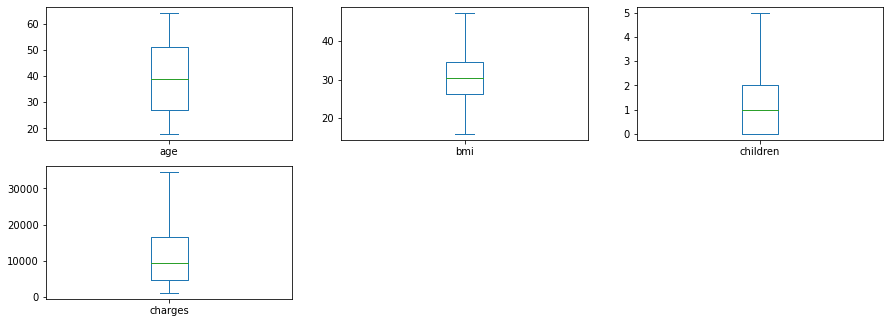

In [8]:
df.plot(kind='box',subplots=True,layout=(7,3),figsize=(15,20))

### **Anomalies detection**

In [9]:
from sklearn.ensemble import IsolationForest
def isolation_forest_anomalies(data,col_list):
    df=data.copy()
    model=IsolationForest(n_estimators=50,max_samples='auto',contamination=float(0.1),max_features=1.0)
    model.fit(df[col_list])
    df['anomaly']=model.predict(df[col_list])
    data_a=df[(df['anomaly']==-1)]
    data_n=df[(df['anomaly']==1)]
    data_a.drop('anomaly',axis=1,inplace=True)
    data_n.drop('anomaly',axis=1,inplace=True)
    print("Length of anomlies found: ",len(data_a))
    print("Length od non anomlies data: ",len(data_n))
    return data_a,data_n


In [10]:
df_a,df_n=isolation_forest_anomalies(df,['age','bmi','children','charges'])

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Length of anomlies found:  134
Length od non anomlies data:  1204


C:\Users\Dell\AppData\Local\Temp\ipykernel_6260\2935600205.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_a.drop('anomaly',axis=1,inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6260\2935600205.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_n.drop('anomaly',axis=1,inplace=True)


In [11]:
df_n.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,   10,
            ...
            1327, 1328, 1329, 1330, 1331, 1332, 1333, 1334, 1335, 1336],
           dtype='int64', length=1204)

**Anomalies detected**

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

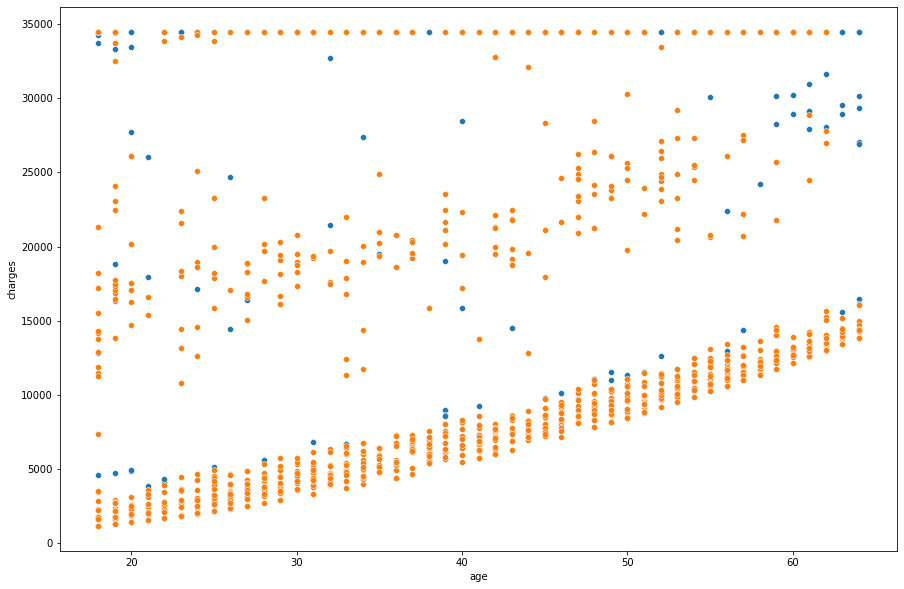

In [12]:
plt.figure(figsize=(15,10))
sns.scatterplot(df_a['age'],df['charges'])
sns.scatterplot(df_n['age'],df['charges'])
plt.plot()


In [13]:
df_n # data with no outliers and anomalies

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


## EDA

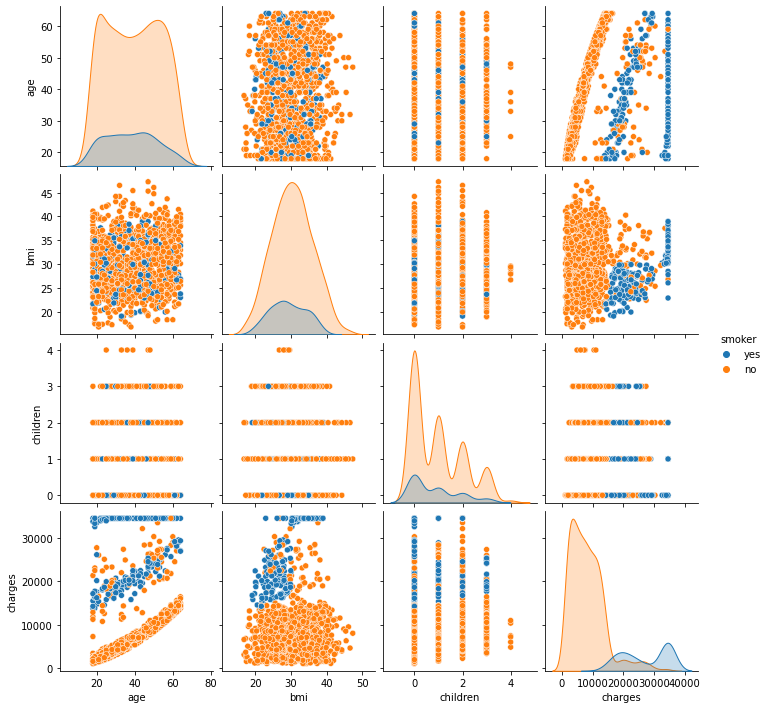

In [14]:
#pair plot 
sns.pairplot(df_n,hue='smoker')

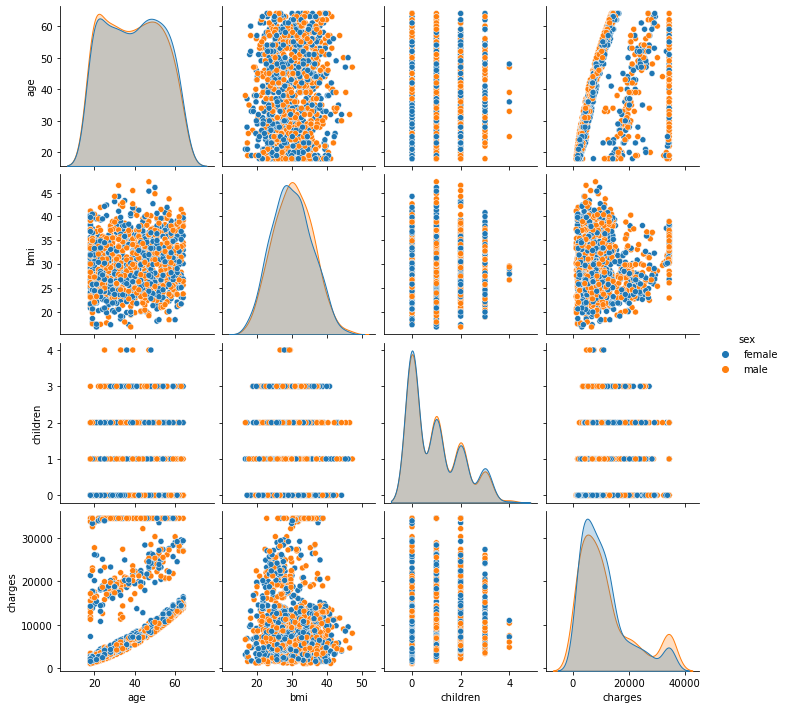

In [15]:
sns.pairplot(df_n,hue='sex')

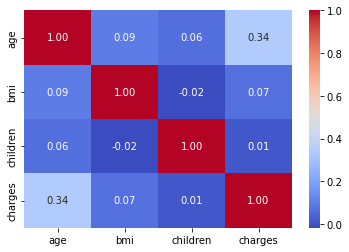

In [16]:
correlation_matrix = df_n.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

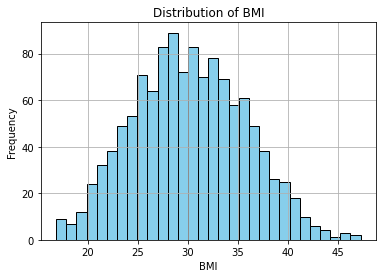

In [17]:
df_n['bmi'].hist(bins=30, color='skyblue', edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Distribution of BMI')
plt.show()

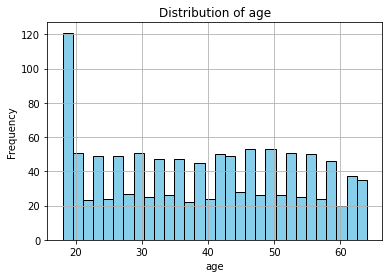

In [18]:
df_n['age'].hist(bins=30, color='skyblue', edgecolor='black')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.title('Distribution of age')
plt.show()

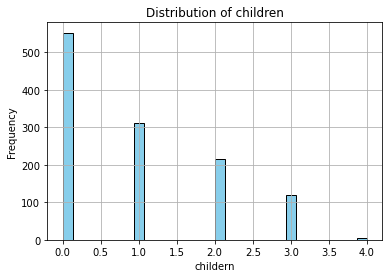

In [19]:
df_n['children'].hist(bins=30, color='skyblue', edgecolor='black')
plt.xlabel('childern')
plt.ylabel('Frequency')
plt.title('Distribution of children')
plt.show()

<AxesSubplot:xlabel='smoker', ylabel='charges'>

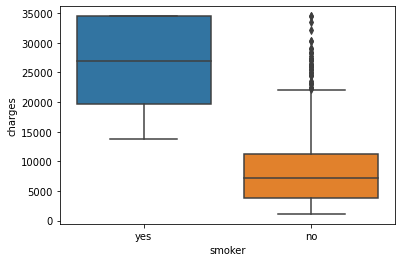

In [20]:
sns.boxplot(x='smoker', y='charges', data=df_n)

<AxesSubplot:xlabel='children', ylabel='charges'>

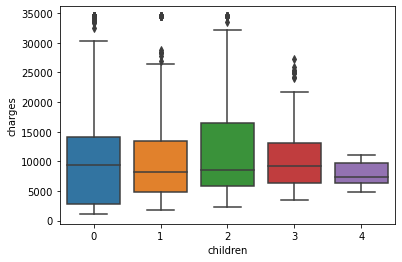

In [21]:
sns.boxplot(x='children', y='charges', data=df_n)

<AxesSubplot:xlabel='sex', ylabel='charges'>

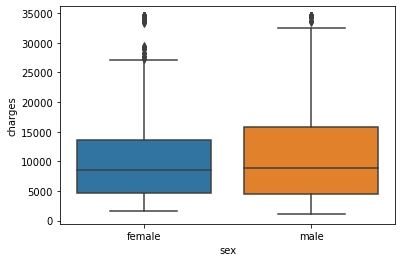

In [22]:
sns.boxplot(x='sex',y='charges',data=df_n)

<AxesSubplot:xlabel='region', ylabel='charges'>

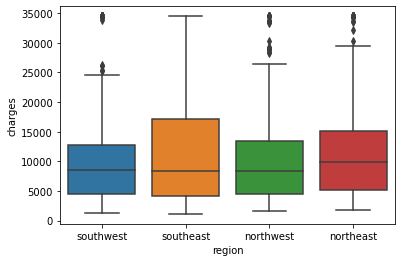

In [23]:
sns.boxplot(x='region',y='charges',data=df_n)

<AxesSubplot:xlabel='region', ylabel='count'>

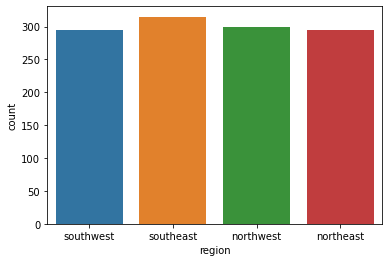

In [24]:
sns.countplot(x='region', data=df_n)

<AxesSubplot:xlabel='sex', ylabel='count'>

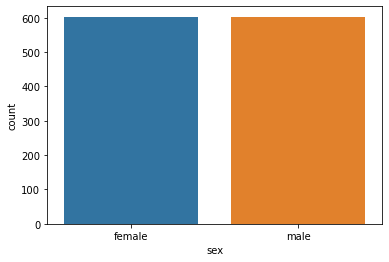

In [25]:
sns.countplot(x='sex', data=df_n)

<AxesSubplot:xlabel='smoker', ylabel='count'>

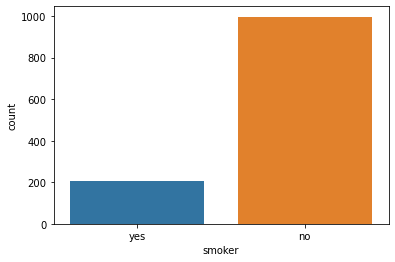

In [26]:
sns.countplot(x='smoker', data=df_n)

<AxesSubplot:xlabel='children', ylabel='count'>

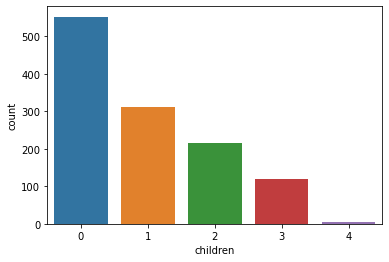

In [27]:
sns.countplot(x='children', data=df_n)

<AxesSubplot:xlabel='children', ylabel='charges'>

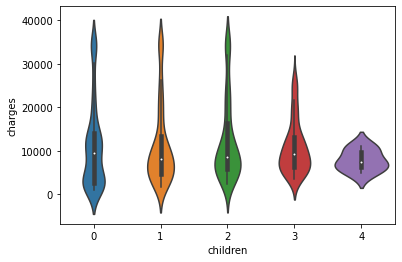

In [28]:
sns.violinplot(x='children', y='charges', data=df_n)

<AxesSubplot:xlabel='sex', ylabel='charges'>

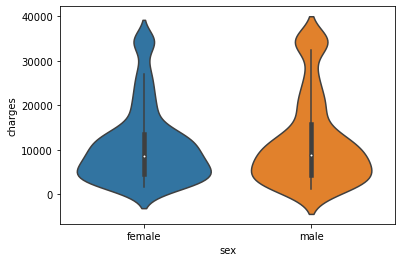

In [29]:
sns.violinplot(x='sex', y='charges', data=df_n)

<AxesSubplot:xlabel='smoker', ylabel='charges'>

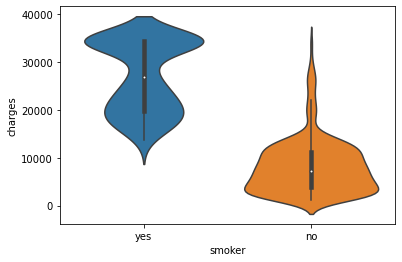

In [30]:
sns.violinplot(x='smoker', y='charges', data=df_n)

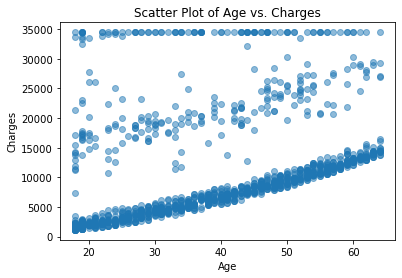

In [31]:
plt.scatter(df_n['age'], df_n['charges'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Scatter Plot of Age vs. Charges')
plt.show()

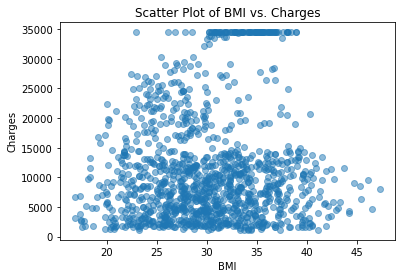

In [32]:
plt.scatter(df_n['bmi'], df_n['charges'], alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Scatter Plot of BMI vs. Charges')
plt.show()

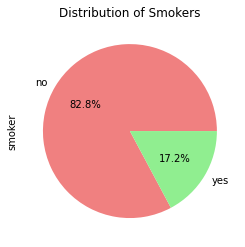

In [33]:
df_n['smoker'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Distribution of Smokers')
plt.show()

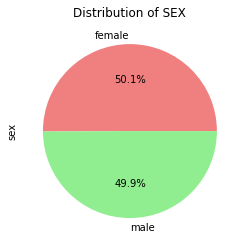

In [34]:
df_n['sex'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Distribution of SEX')
plt.show()

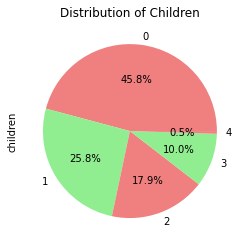

In [35]:
df_n['children'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Distribution of Children')
plt.show()

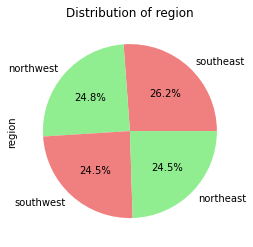

In [36]:
df_n['region'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Distribution of region')
plt.show()

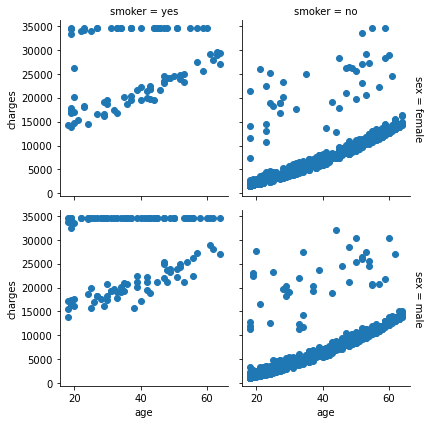

In [37]:
g = sns.FacetGrid(df_n, col='smoker', row='sex', margin_titles=True)
g.map(plt.scatter, 'age', 'charges')
g.add_legend()

## **Data Preprocessing**

### **Label Encoding**

In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()


In [15]:
df_n

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


In [16]:
df_n['sex']=label_encoder.fit_transform(df_n['sex'])
df_n['region']=label_encoder.fit_transform(df_n['region'])
df_n['smoker']=label_encoder.fit_transform(df_n['smoker'])

In [17]:
df_n

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1332,52,0,44.700,3,0,3,11411.68500
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350


### **standardization**

In [18]:
from sklearn.preprocessing import StandardScaler
standard_scaler=StandardScaler()

In [19]:
df_n[['age','bmi','charges']]=standard_scaler.fit_transform(df_n[['age','bmi','charges']])

In [20]:
df_n.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.459265,0,-0.411726,0,1,3,0.631975
1,-1.532331,1,0.618906,1,0,2,-1.038697
2,-0.801667,1,0.483712,3,0,2,-0.738502
3,-0.436335,1,-1.323844,0,0,1,1.193982
4,-0.509402,1,-0.239661,0,0,1,-0.802710


age            AxesSubplot(0.125,0.787927;0.227941x0.0920732)
sex         AxesSubplot(0.398529,0.787927;0.227941x0.0920732)
bmi         AxesSubplot(0.672059,0.787927;0.227941x0.0920732)
children       AxesSubplot(0.125,0.677439;0.227941x0.0920732)
smoker      AxesSubplot(0.398529,0.677439;0.227941x0.0920732)
region      AxesSubplot(0.672059,0.677439;0.227941x0.0920732)
charges        AxesSubplot(0.125,0.566951;0.227941x0.0920732)
dtype: object

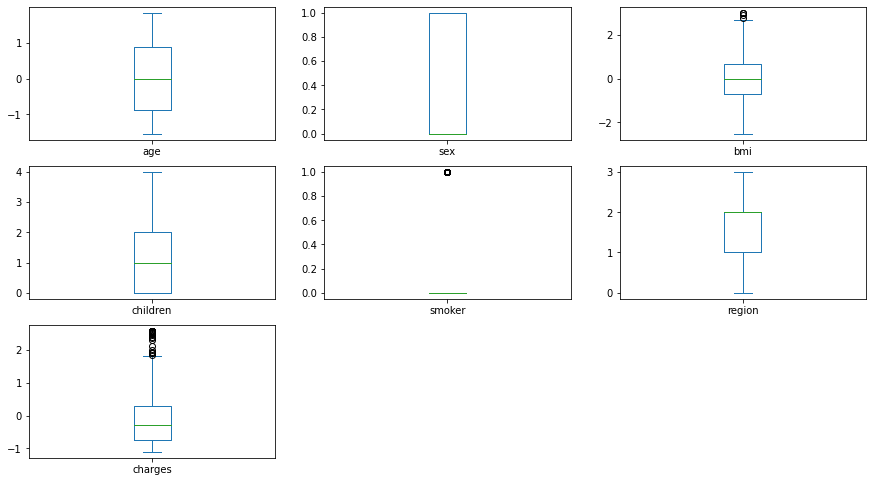

In [21]:
df_n.plot(kind='box',subplots=True,layout=(7,3),figsize=(15,20))

### **splitting data into training and testing**

In [22]:
from sklearn.model_selection import train_test_split

In [24]:
df_n.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.459265,0,-0.411726,0,1,3,0.631975
1,-1.532331,1,0.618906,1,0,2,-1.038697
2,-0.801667,1,0.483712,3,0,2,-0.738502
3,-0.436335,1,-1.323844,0,0,1,1.193982
4,-0.509402,1,-0.239661,0,0,1,-0.802710


In [26]:
X_train,X_test,Y_train,Y_test=train_test_split(df_n[['age','sex','bmi','children','smoker','region']],df_n[['charges']],test_size=0.33)

print("X_train shape:",X_train.shape)
print("X_test shape: ",X_test.shape)
print("y_train shape: ",Y_train.shape)
print("y_test shape: ",Y_test.shape)

X_train shape: (806, 6)
X_test shape:  (398, 6)
y_train shape:  (806, 1)
y_test shape:  (398, 1)


In [27]:
## feature engineering 
"""
handling categorical features ( one hot encoding or label encoding 
binning or bucketing
log transform
scaling 
time based features
handling missing values
domain specific features
aggregation or statics)
"""

'\nhandling categorical features ( one hot encoding or label encoding \nbinning or bucketing\nlog transform\nscaling \ntime based features\nhandling missing values\ndomain specific features\naggregation or statics)\n'

In [29]:
## model evalution function

from sklearn import metrics
def get_error(model,X_train,X_test,y_train,y_test,pt=False):
  y_pred=model.predict(X_test)
  mae=metrics.mean_absolute_error(y_pred,y_pred)
  mse=metrics.mean_squared_error(y_pred,y_test)
  r2=np.sqrt(metrics.mean_squared_error(y_pred,y_test))
  if pt==True:
    print("Mean Absolute error: ",mae)
    print("Mean Squared error: ",mse)
    print("R2 error: ",r2)
  return mae,mse,r2

In [30]:
# df for metrics evalution
results=pd.DataFrame(columns=['model','Mean Absolute error','Mean Squared error','R2 error'])


In [40]:
##model selection

## Model Training

In [37]:
# liner regression model
from sklearn.linear_model import  LinearRegression
lr=LinearRegression()

lr.fit(X_train,Y_train)

mae,mse,r2=get_error(lr,X_train,X_test,Y_train,Y_test,pt=True)

mv={'model':'Linear Regression','Mean Absolute error':mae,'Mean Squared error':mse,'R2 error':r2}
results=results.append(mv,ignore_index=True)

Mean Absolute error:  0.0
Mean Squared error:  0.22628928034231474
R2 error:  0.47569872854813766


C:\Users\Dell\AppData\Local\Temp\ipykernel_6260\3956954152.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append(mv,ignore_index=True)


In [38]:
#Decision_tree_Regressor

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

dtr.fit(X_train,Y_train)

mae,mse,r2=get_error(dtr,X_train,X_test,Y_train,Y_test,pt=True)

mv={'model':'Decision Tree Regressor','Mean Absolute error':mae,'Mean Squared error':mse,'R2 error':r2}
results=results.append(mv,ignore_index=True)

Mean Absolute error:  0.0
Mean Squared error:  0.3597168104656105
R2 error:  0.5997639622931762


C:\Users\Dell\AppData\Local\Temp\ipykernel_6260\2775343739.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append(mv,ignore_index=True)


In [39]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 100)
rfr.fit(X_train,Y_train)

mae,mse,r2=get_error(rfr,X_train,X_test,Y_train,Y_test,pt=True)
mv={'model':'Random forest regressor','Mean Absolute error':mae,'Mean Squared error':mse,'R2 error':r2}
results=results.append(mv,ignore_index=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_6260\4242667621.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train,Y_train)


Mean Absolute error:  0.0
Mean Squared error:  0.2154905882034976
R2 error:  0.4642096382061639


C:\Users\Dell\AppData\Local\Temp\ipykernel_6260\4242667621.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append(mv,ignore_index=True)


### Model Evalution

In [41]:
results

,model,Mean Absolute error,Mean Squared error,R2 error
0,Linear Regression,0.0,0.226289,0.475699
1,Decision Tree Regressor,0.0,0.359717,0.599764
2,Random forest regressor,0.0,0.215491,0.46421


[]

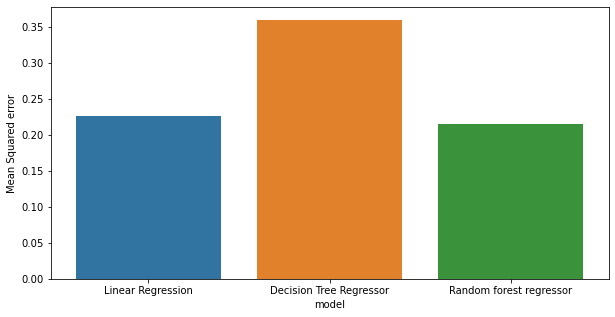

In [42]:
plt.figure(figsize=(10,5))
sns.barplot(x=results['model'],y=results['Mean Squared error'])
plt.plot()

[]

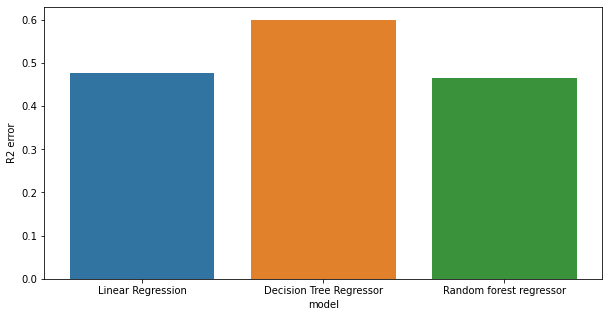

In [43]:
plt.figure(figsize=(10,5))
sns.barplot(x=results['model'],y=results['R2 error'])
plt.plot()

## Hyper Parameter tuning

###  hyper paramenter tuning for random forest regressor

In [47]:

from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


from sklearn.ensemble import RandomForestRegressor

# Example for Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, Y_train)


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was pa

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was pa

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was pa

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was pa

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was pa

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was pa

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was pa

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was pa

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was pa

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was pa

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was pa

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was pa

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was pa

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was pa

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [48]:
# best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
# Evaluate performance using metrics (e.g., MSE, MAE)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}
